In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\samsritha\\Cardio_DataSet.csv")

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Customer Segmentation by Product

## Identify the key demographics (age, gender, education, income, fitness level) for each product to understand which customer groups prefer specific products.

Demographic Summary by Product:
           Age  Education  Fitness     Income
Product                                      
TM195    28.55  15.037500   2.9625  46418.025
TM498    28.90  15.116667   2.9000  48973.650
TM798    29.10  17.325000   4.6250  75441.575 
 Product
TM195    Female
TM498      Male
TM798      Male
Name: Gender, dtype: object


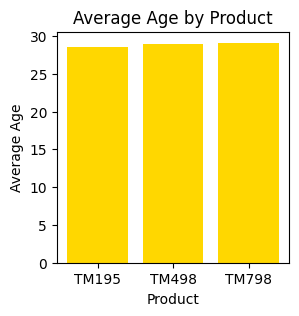

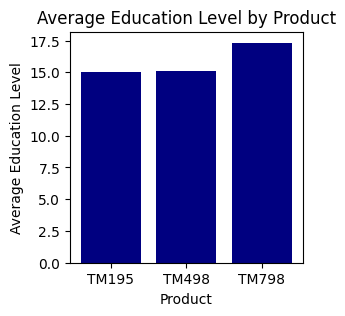

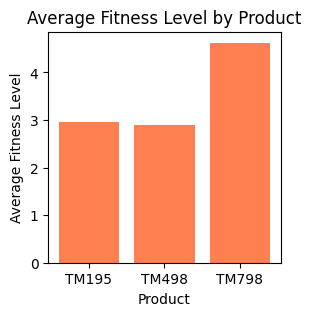

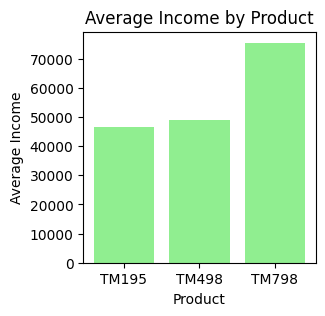

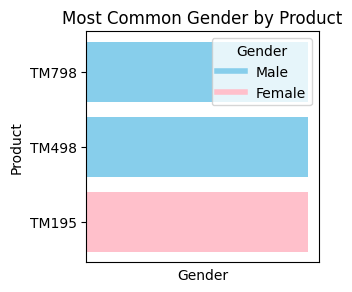

In [55]:

a=df.groupby('Product')[['Age','Education','Fitness','Income']].mean()
b=df.groupby('Product')['Gender'].agg(lambda x: x.mode()[0])

print("Demographic Summary by Product:")
print(a,"\n",b)

# age
plt.figure(figsize=(3,3))
plt.bar(a.index, a['Age'], color='gold')
plt.title('Average Age by Product')
plt.xlabel('Product')
plt.ylabel('Average Age')

# education 
plt.figure(figsize=(3,3))
plt.bar(a.index, a['Education'], color='navy')
plt.title('Average Education Level by Product')
plt.xlabel('Product')
plt.ylabel('Average Education Level')

# fitness
plt.figure(figsize=(3,3))
plt.bar(a.index, a['Fitness'], color='coral')
plt.title('Average Fitness Level by Product')
plt.xlabel('Product')
plt.ylabel('Average Fitness Level')

# income
plt.figure(figsize=(3,3))
plt.bar(a.index, a['Income'], color='lightgreen')
plt.title('Average Income by Product')
plt.xlabel('Product')
plt.ylabel('Average Income')

# gender

products =b.index
genders =b.values
# Assigning colors based on gender
colors = ['skyblue' if Gender == 'Male' else 'pink' for Gender in genders]

plt.figure(figsize=(3,3))
plt.barh(products, [1] * len(products), color=colors)
plt.title('Most Common Gender by Product')
plt.xlabel('Gender')
plt.ylabel('Product')
plt.yticks(products)
plt.xticks([])
plt.legend(handles=[plt.Line2D([0], [0], color='skyblue', lw=4, label='Male'),
                    plt.Line2D([0], [0], color='pink', lw=4, label='Female')],
           title='Gender')

plt.show()


## Usage Patterns

## Analyze how often customers of different products use the fitness equipment and the miles they expect to run.


Average Usage Frequency and Expected Miles by Product:
  Product     Usage       Miles
0   TM195  3.087500   82.787500
1   TM498  3.066667   87.933333
2   TM798  4.775000  166.900000


Text(0, 0.5, 'Average Expected Miles (miles)')

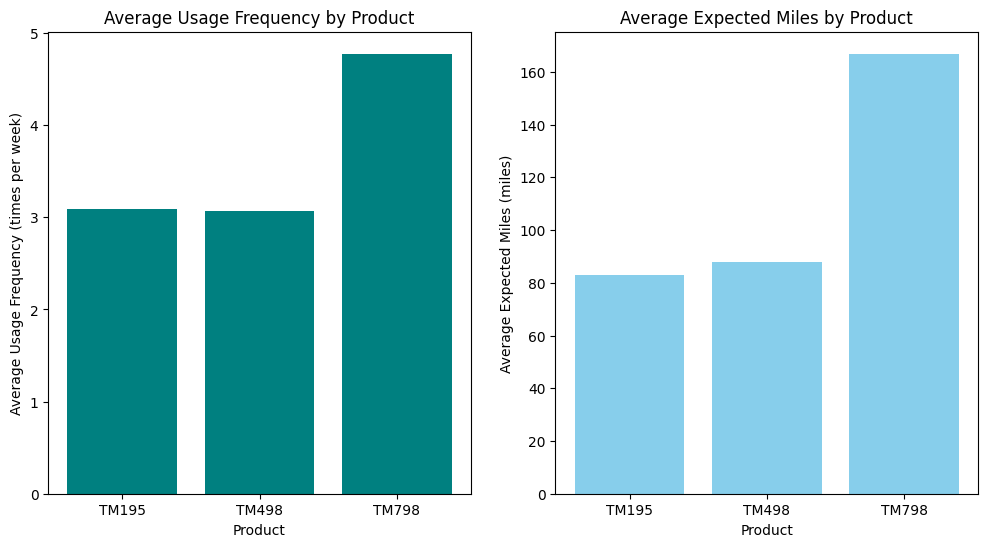

In [52]:
usage_of_product= df.groupby('Product').agg({
    'Usage': 'mean',  
    'Miles': 'mean' 
}).reset_index()
print("\nAverage Usage Frequency and Expected Miles by Product:")
print(usage_of_product)

# usage frequency
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(usage_of_product['Product'], usage_of_product['Usage'], color='teal')
plt.title('Average Usage Frequency by Product')
plt.xlabel('Product')
plt.ylabel('Average Usage Frequency (times per week)')

# expected miles
plt.subplot(1, 2, 2)
plt.bar(usage_of_product['Product'], usage_of_product['Miles'], color='skyblue')
plt.title('Average Expected Miles by Product')
plt.xlabel('Product')
plt.ylabel('Average Expected Miles (miles)')

## Fitness and Lifestyle Insights

## Determine whether fitness levels correlate with product preferences.


Counts of Products by Fitness Level:
Product  TM195  TM498  TM798
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

Correlation Matrix:
Product     TM195     TM498     TM798
Product                              
TM195    1.000000  0.996533 -0.285805
TM498    0.996533  1.000000 -0.348358
TM798   -0.285805 -0.348358  1.000000


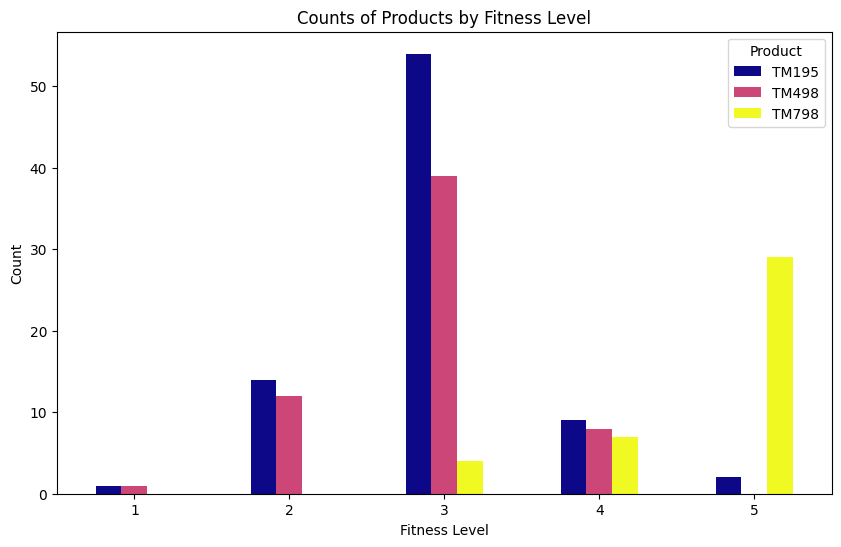

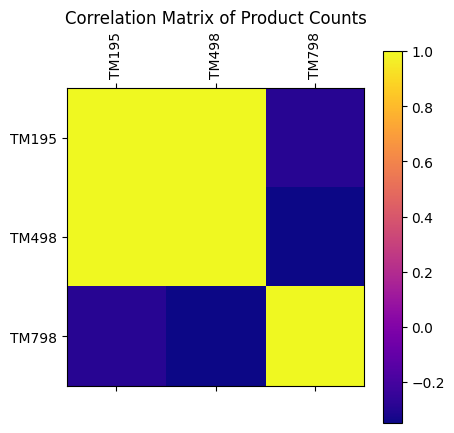

In [99]:
cf = df.groupby(['Fitness', 'Product']).size().unstack(fill_value=0)
print("\nCounts of Products by Fitness Level:")
print(cf)

# Calculate correlation
correlation = cf.corr()
print("\nCorrelation Matrix:")
print(correlation)

# counts of products by fitness level
cf.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Counts of Products by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.legend(title='Product')
plt.xticks(rotation=0)
plt.show()

# heatmap for correlation matrix
plt.matshow(correlation, cmap='plasma')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.index)), correlation.index)
plt.title('Correlation Matrix of Product Counts')
plt.show()


## Income and Pricing Strategy

## Explore the relationship between customer income and the product purchased, which can inform pricing and promotional strategies

  Product     Income
0   TM195  46418.025
1   TM498  48973.650
2   TM798  75441.575


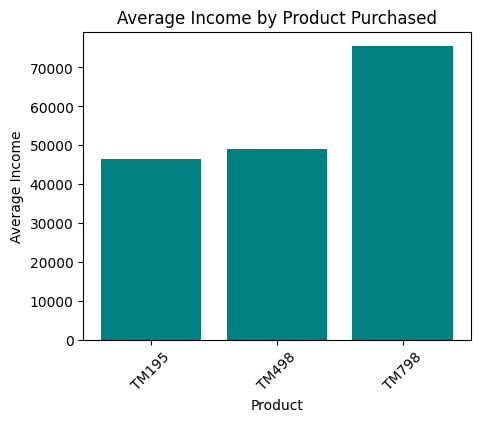

For TM195:
  - Consider lower pricing or discounts to attract customers.
For TM498:
  - Consider lower pricing or discounts to attract customers.
For TM798:
  - Current pricing seems appropriate; consider premium offers or loyalty programs.


In [100]:
average_income_by_product = df.groupby('Product')['Income'].mean().reset_index()
print(average_income_by_product )

plt.figure(figsize=(5, 4))
plt.bar(average_income_by_product['Product'],average_income_by_product['Income'], color='teal')
plt.title('Average Income by Product Purchased')
plt.xlabel('Product')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()
# promotional strategies
for index, row in average_income_by_product.iterrows():
    print(f"For {row['Product']}:")
    if row['Income'] < 50000:  
        print("  - Consider lower pricing or discounts to attract customers.")
    else:
        print("  - Current pricing seems appropriate; consider premium offers or loyalty programs.")


## Targeting New Customers

### Based on the profiles of existing customers, provide recommendations on which segments to target more effectively with specific products.

In [80]:
customer_profiles = df.groupby('Product')[['Age', 'Income', 'Miles', 'Fitness']].mean()
print(customer_profiles)

# Access profiles for each product
tm195_income = customer_profiles.loc['TM195', 'Income']
tm498_income = customer_profiles.loc['TM498', 'Income']
tm498_fitness = customer_profiles.loc['TM498', 'Fitness']
tm798_income = customer_profiles.loc['TM798', 'Income']

# Generating recommendations
tm195_recommendation = "Target younger customers with moderate income (around {}).".format(tm195_income)
tm498_recommendation = "Focus on customers with higher fitness levels (around {}) and income (around {}).".format(tm498_fitness, tm498_income)
tm798_recommendation = "Market to high-income individuals (around {}) who are serious about fitness.".format(tm798_income)

print("\n****** RECOMMENDATIONS *****")
print("\nTM195: {}".format(tm195_recommendation))
print("TM498: {}".format(tm498_recommendation))
print("TM798: {}".format(tm798_recommendation))


           Age     Income       Miles  Fitness
Product                                       
TM195    28.55  46418.025   82.787500   2.9625
TM498    28.90  48973.650   87.933333   2.9000
TM798    29.10  75441.575  166.900000   4.6250

****** RECOMMENDATIONS *****

TM195: Target younger customers with moderate income (around 46418.025).
TM498: Focus on customers with higher fitness levels (around 2.9) and income (around 48973.65).
TM798: Market to high-income individuals (around 75441.575) who are serious about fitness.
